In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import filters
from math import pi

In [2]:
def get_bin_im(im_path):
    im = cv2.imread(im_path)
    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gauss = cv2.GaussianBlur(imgray, (5, 5), 0)
    plt.imshow(im_gauss)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    otsu_threshold = filters.threshold_otsu(im_gauss)
    bin_im = np.empty(im_gauss.shape)
    for row_ind in range(len(im_gauss)):
        row = im_gauss[row_ind]
        for col_ind in range(len(row)):
            bin_im[row_ind][col_ind] = 1 if im_gauss[row_ind][col_ind] < otsu_threshold else 0
    
    plt.imshow(bin_im)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return bin_im

In [3]:
def get_perimeter(mat):
    # credit: m.m.a. 11 Dec. 2019 Meier Hall
    susm = signal.convolve2d(mat, np.ones((2,2)))
    corners = np.argwhere(susm == 1)
    center  = np.array(susm.shape)/2

    cor = (corners - center)
    theta = np.arctan2(cor[:,0], cor[:,1])[:, np.newaxis]

    a = np.concatenate([theta, cor], axis=1)
    sort = a[a[:,0].argsort()][:,1:]

    squares = (sort - np.roll(sort, 1, axis=0))**2
    return np.sqrt(squares.sum(axis=1)).sum()

In [4]:
def get_circularity(bin_im):
    perimeter = get_perimeter(bin_im)
    area = np.sum(bin_im)
    return 4 * np.pi * area/ perimeter**2

In [5]:
models = ['83-2',
          '84-3',
          '84-10',
          '86-75',
          '86-85',
          '86-92',
          '86-93',
          '86-95',
          '86-99',
          '86-100',
          '86-107',
          '86-110',
          '86-113',
          '86-117',
          '86-120',
          'UN16',
          'W43',
          'W55',
          'Y7',
          'Y11',
          'Y14',
          'Y15',
          'Y22',
          'Y28',
          'Y32',
          'Y39',
          'Y45',
          'Y114',
          'Y123',
          'Y126',
          'Y127',
          'Y128']

Model: 83-2


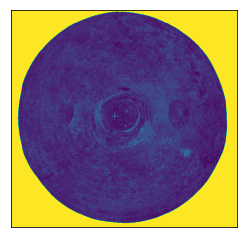

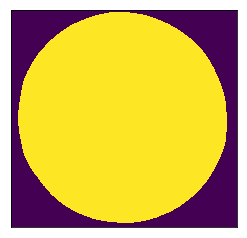

Circularity: 0.9884745601805464 

----------------------------------


Model: 84-3


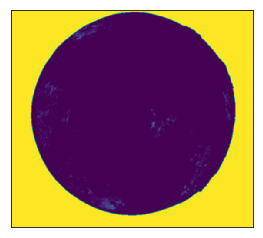

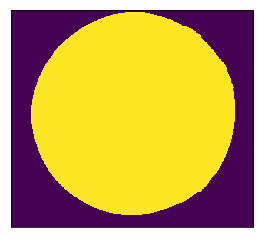

Circularity: 0.9781679101173496 

----------------------------------


Model: 84-10


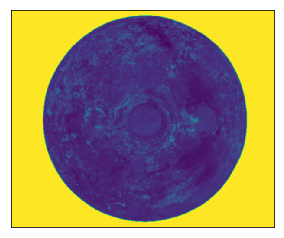

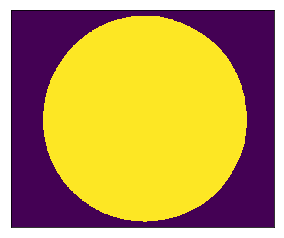

Circularity: 0.9876483373880012 

----------------------------------


Model: 86-75


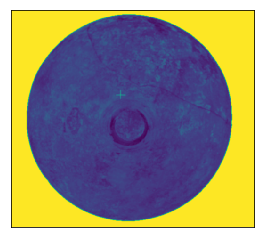

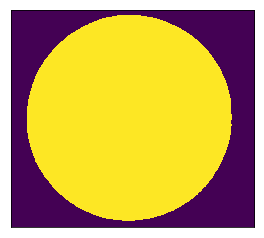

Circularity: 0.9872685109988966 

----------------------------------


Model: 86-85


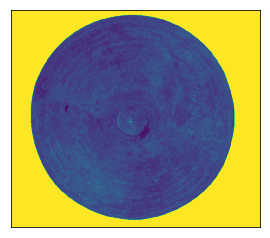

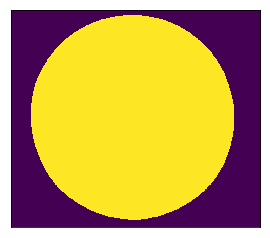

Circularity: 0.9888615780101863 

----------------------------------


Model: 86-92


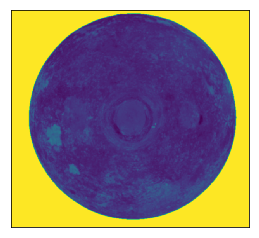

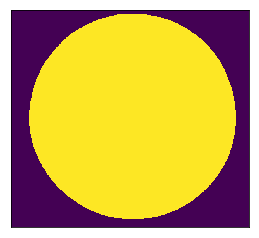

Circularity: 0.9866657145901072 

----------------------------------


Model: 86-93


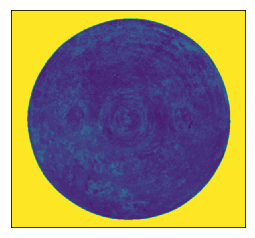

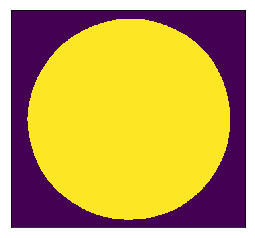

Circularity: 0.987947372716707 

----------------------------------


Model: 86-95


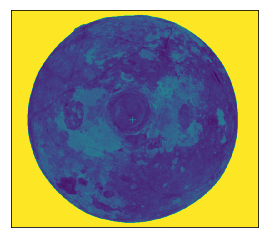

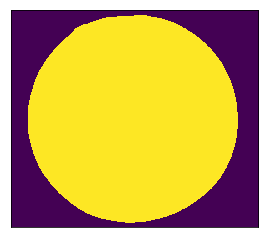

Circularity: 0.9853806268241583 

----------------------------------


Model: 86-99


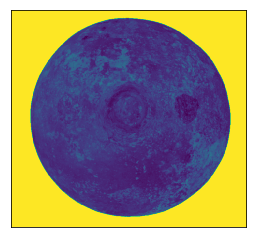

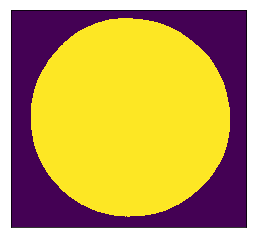

Circularity: 0.988303385703689 

----------------------------------


Model: 86-100


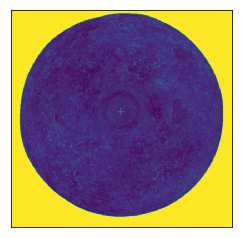

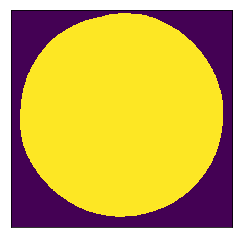

Circularity: 0.9879975728494896 

----------------------------------


Model: 86-107


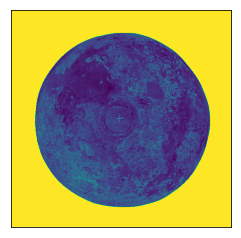

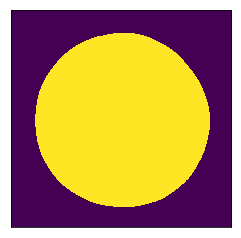

Circularity: 0.9864669721973142 

----------------------------------


Model: 86-110


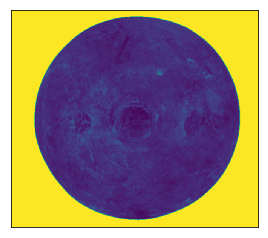

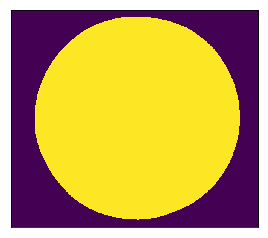

Circularity: 0.988473060283043 

----------------------------------


Model: 86-113


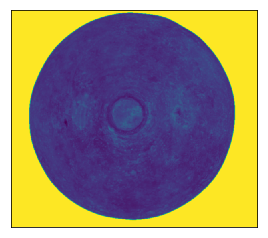

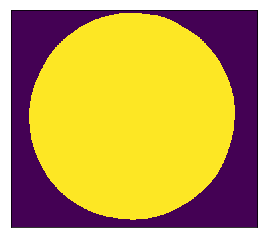

Circularity: 0.9881212709084718 

----------------------------------


Model: 86-117


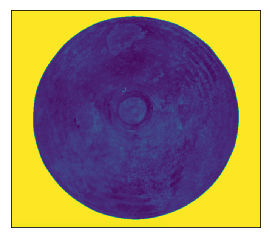

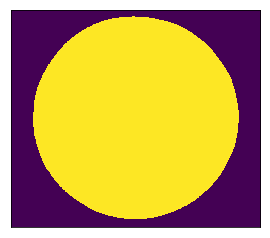

Circularity: 0.9877022863458087 

----------------------------------


Model: 86-120


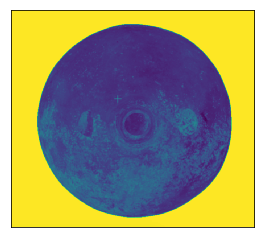

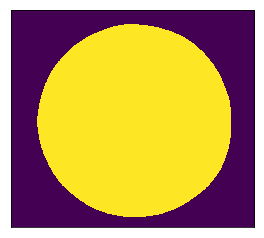

Circularity: 0.9879314097748163 

----------------------------------


Model: UN16


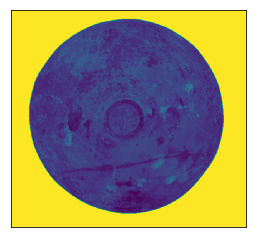

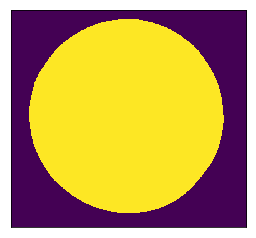

Circularity: 0.9868549898312943 

----------------------------------


Model: W43


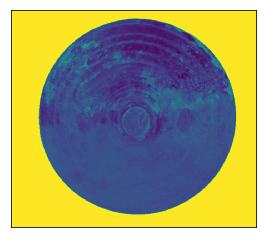

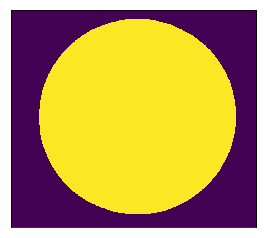

Circularity: 0.9874974658441381 

----------------------------------


Model: W55


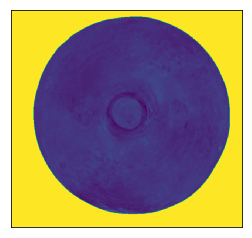

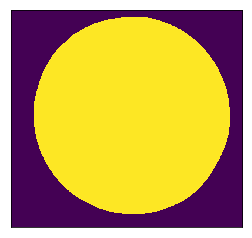

Circularity: 0.9879541314763688 

----------------------------------


Model: Y7


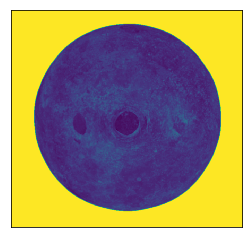

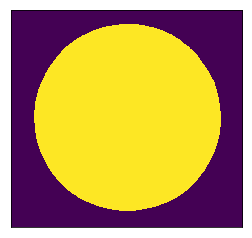

Circularity: 0.9884125782291835 

----------------------------------


Model: Y11


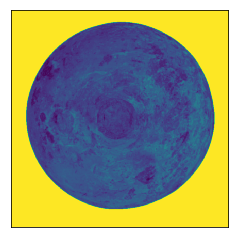

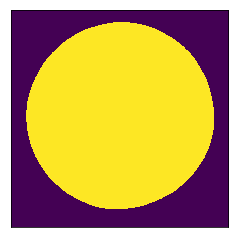

Circularity: 0.988561910583171 

----------------------------------


Model: Y14


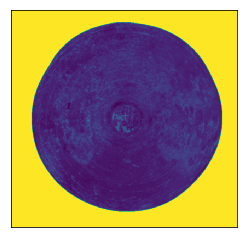

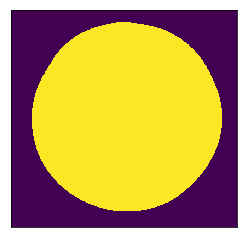

Circularity: 0.987818369088075 

----------------------------------


Model: Y15


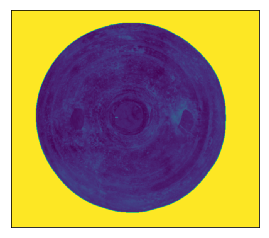

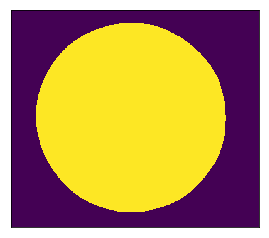

Circularity: 0.9874877840070979 

----------------------------------


Model: Y22


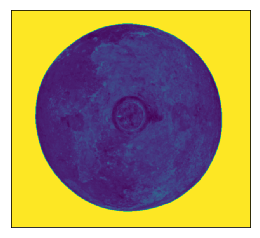

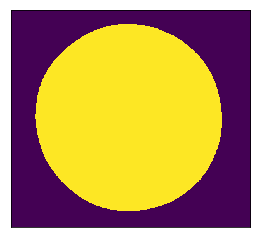

Circularity: 0.9867764686217634 

----------------------------------


Model: Y28


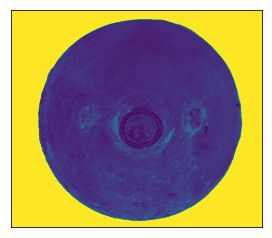

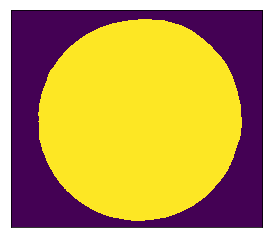

Circularity: 0.983322377070281 

----------------------------------


Model: Y32


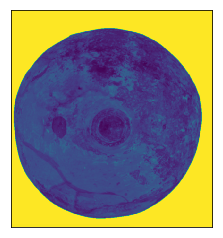

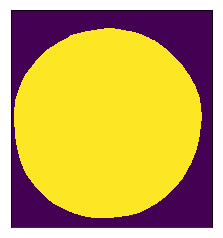

Circularity: 0.9865321172848384 

----------------------------------


Model: Y39


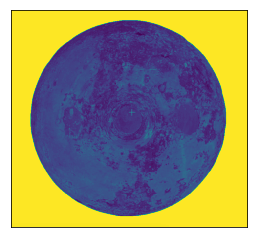

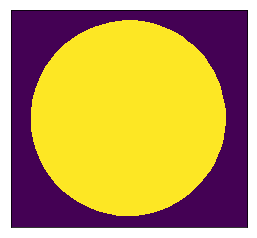

Circularity: 0.9875135271491872 

----------------------------------


Model: Y45


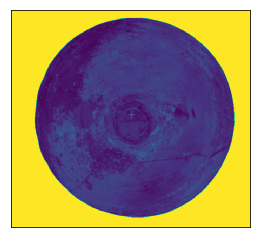

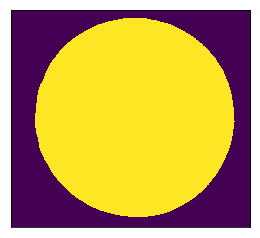

Circularity: 0.9881207574113051 

----------------------------------


Model: Y114


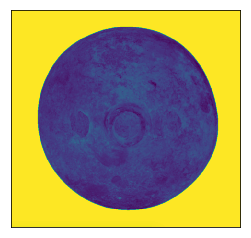

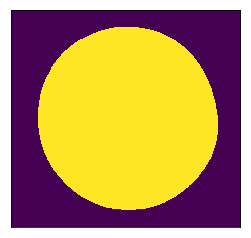

Circularity: 0.9881891737113065 

----------------------------------


Model: Y123


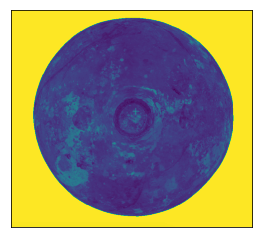

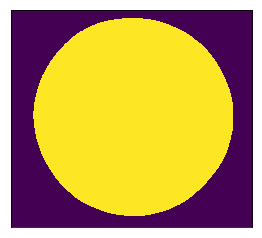

Circularity: 0.9883717342522954 

----------------------------------


Model: Y126


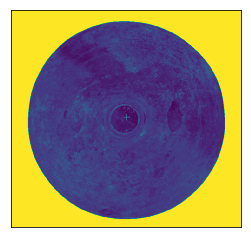

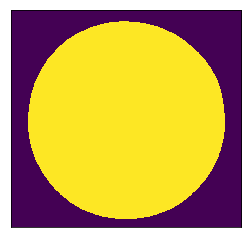

Circularity: 0.9890170560615381 

----------------------------------


Model: Y127


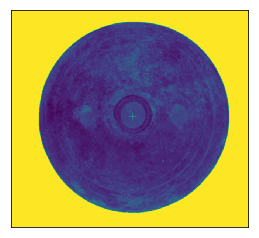

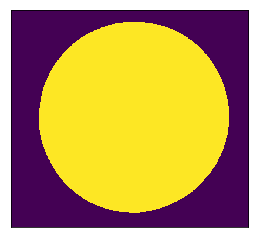

Circularity: 0.9880894278372954 

----------------------------------


Model: Y128


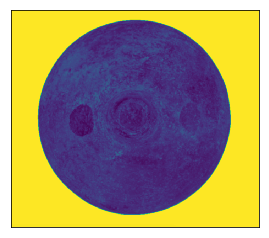

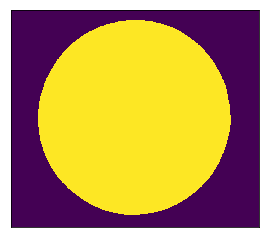

Circularity: 0.9883111928204369 

----------------------------------




In [6]:
circularities = []
for model in models:
    print('Model: %s' % model)
    im_path = './circles/circle_%s.png' % model
    bin_im = get_bin_im(im_path)
    circularity = get_circularity(bin_im)
    print('Circularity: %s \n\n----------------------------------\n\n' % circularity)
    circularities.append(circularity)

In [7]:
circularities

[0.9884745601805464,
 0.9781679101173496,
 0.9876483373880012,
 0.9872685109988966,
 0.9888615780101863,
 0.9866657145901072,
 0.987947372716707,
 0.9853806268241583,
 0.988303385703689,
 0.9879975728494896,
 0.9864669721973142,
 0.988473060283043,
 0.9881212709084718,
 0.9877022863458087,
 0.9879314097748163,
 0.9868549898312943,
 0.9874974658441381,
 0.9879541314763688,
 0.9884125782291835,
 0.988561910583171,
 0.987818369088075,
 0.9874877840070979,
 0.9867764686217634,
 0.983322377070281,
 0.9865321172848384,
 0.9875135271491872,
 0.9881207574113051,
 0.9881891737113065,
 0.9883717342522954,
 0.9890170560615381,
 0.9880894278372954,
 0.9883111928204369]

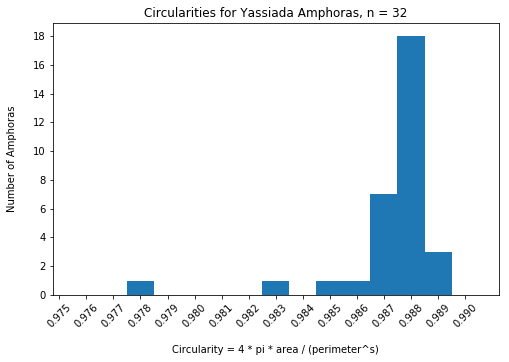

In [15]:
width = 0.001
plt.figure(figsize=(8, 5))
plt.title('Circularities for Yassiada Amphoras, n = 32')
plt.hist(circularities, bins=np.arange(0.975, 0.99, width)+width/2)
plt.xticks(np.arange(0.975, 0.99, width), rotation=45)
plt.yticks(np.arange(0, 20, 2))
plt.xlabel('\nCircularity = 4 * pi * area / (perimeter^s)')
plt.ylabel('Number of Amphoras\n')
plt.show()

Reference Circle


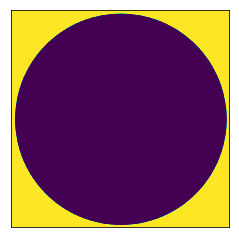

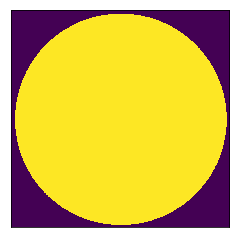

Circularity: 0.9907886363650886


In [14]:
print('Reference Circle')
im_path = './circles/circle_ref.png'
bin_im = get_bin_im(im_path)
circularity = get_circularity(bin_im)
print('Circularity: %s' % circularity)